# Policy sweep plotting

This notebook loads epoch-level aggregates from multiple runs and plots average reward over epochs.
- X axis: epoch
- Y axis: mean reward (per-epoch average across trajectories)
- One trace per policy class (or per policy class + run if desired)
- Optionally ignore duplicates by collapsing multiple runs of the same policy into a single trace (mean of means)

In [5]:
# Imports
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from results.epoch_agg_loader import load_epoch_agg, basic_summary_by_policy

In [6]:
# Configuration
DATA_DIR = "results/parquet"  # directory passed to --output-dir when running experiments
SETUP = "setup_1"            # which environment setup to plot
AGENT_NAME = "agent1"         # which agent to plot (the swept agent)
COLLAPSE_DUPLICATES = True        # True: one trace per policy_class; False: one per (policy_class + run_id)
FILTER_LABEL = None               # Optionally filter to a specific run label (string)

In [7]:
# Load all epoch aggregate parquet files
df = load_epoch_agg(DATA_DIR)
if df.empty:
    print(f'No parquet files found under: {DATA_DIR}')
    df
else:
    display(df.head())
    print('Rows:', len(df))

,run_id,config_hash,label,setup,num_days,num_trajs,num_epochs,epoch,agent_name,policy_class,policy_params_json,mean_reward,std_reward,n_trajs
0,3f9c2aab-6198-4164-93f9-e86688f33425,57bd956d60b9c9fd989287d01a9e3a466a85fab88880b8...,None,setup_1,1,200,10,0,agent1,REINFORCE_Gaussian_v3_MarketEnv_Continuous,"{""auction_item_spec_ids"": [2], ""budget_per_rea...",0.120289,4.929819,200
1,3f9c2aab-6198-4164-93f9-e86688f33425,57bd956d60b9c9fd989287d01a9e3a466a85fab88880b8...,None,setup_1,1,200,10,0,agent2,FixedBidPolicy,"{""bid_per_item"": 5, ""total_limit"": 5}",0.000000,0.000000,200
2,3f9c2aab-6198-4164-93f9-e86688f33425,57bd956d60b9c9fd989287d01a9e3a466a85fab88880b8...,None,setup_1,1,200,10,1,agent1,REINFORCE_Gaussian_v3_MarketEnv_Continuous,"{""auction_item_spec_ids"": [2], ""budget_per_rea...",0.256182,5.207071,200
3,3f9c2aab-6198-4164-93f9-e86688f33425,57bd956d60b9c9fd989287d01a9e3a466a85fab88880b8...,None,setup_1,1,200,10,1,agent2,FixedBidPolicy,"{""bid_per_item"": 5, ""total_limit"": 5}",0.000000,0.000000,200
4,3f9c2aab-6198-4164-93f9-e86688f33425,57bd956d60b9c9fd989287d01a9e3a466a85fab88880b8...,None,setup_1,1,200,10,2,agent1,REINFORCE_Gaussian_v3_MarketEnv_Continuous,"{""auction_item_spec_ids"": [2], ""budget_per_rea...",-0.111144,4.495561,200


Rows: 40


In [8]:
# Filter to selected setup and agent, and optional label
if df.empty:
    filtered = df.copy()
else:
    filtered = df[(df['setup'] == SETUP) & (df['agent_name'] == AGENT_NAME)].copy()
    if FILTER_LABEL is not None:
        filtered = filtered[filtered['label'] == FILTER_LABEL]
    filtered = filtered.sort_values(['policy_class', 'run_id', 'epoch']).reset_index(drop=True)

print('Unique policy classes:', sorted(filtered['policy_class'].unique()) if not filtered.empty else [])
print('Unique runs:', filtered['run_id'].nunique() if not filtered.empty else 0)
display(filtered.head())

Unique policy classes: ['REINFORCE_Gaussian_v2_MarketEnv_Continuous', 'REINFORCE_Gaussian_v3_MarketEnv_Continuous']
Unique runs: 2


,run_id,config_hash,label,setup,num_days,num_trajs,num_epochs,epoch,agent_name,policy_class,policy_params_json,mean_reward,std_reward,n_trajs
0,c9b4e1d3-3357-4ae3-a7fb-09aa092c9682,4914723e989f7c7de3aff473929ada607484dd1c7dbde0...,None,setup_1,1,200,10,0,agent1,REINFORCE_Gaussian_v2_MarketEnv_Continuous,"{""auction_item_spec_ids"": [2], ""budget_per_rea...",0.253613,5.129161,200
1,c9b4e1d3-3357-4ae3-a7fb-09aa092c9682,4914723e989f7c7de3aff473929ada607484dd1c7dbde0...,None,setup_1,1,200,10,1,agent1,REINFORCE_Gaussian_v2_MarketEnv_Continuous,"{""auction_item_spec_ids"": [2], ""budget_per_rea...",-0.039589,4.795589,200
2,c9b4e1d3-3357-4ae3-a7fb-09aa092c9682,4914723e989f7c7de3aff473929ada607484dd1c7dbde0...,None,setup_1,1,200,10,2,agent1,REINFORCE_Gaussian_v2_MarketEnv_Continuous,"{""auction_item_spec_ids"": [2], ""budget_per_rea...",0.233743,4.875879,200
3,c9b4e1d3-3357-4ae3-a7fb-09aa092c9682,4914723e989f7c7de3aff473929ada607484dd1c7dbde0...,None,setup_1,1,200,10,3,agent1,REINFORCE_Gaussian_v2_MarketEnv_Continuous,"{""auction_item_spec_ids"": [2], ""budget_per_rea...",-0.444062,5.063218,200
4,c9b4e1d3-3357-4ae3-a7fb-09aa092c9682,4914723e989f7c7de3aff473929ada607484dd1c7dbde0...,None,setup_1,1,200,10,4,agent1,REINFORCE_Gaussian_v2_MarketEnv_Continuous,"{""auction_item_spec_ids"": [2], ""budget_per_rea...",0.505967,4.671007,200


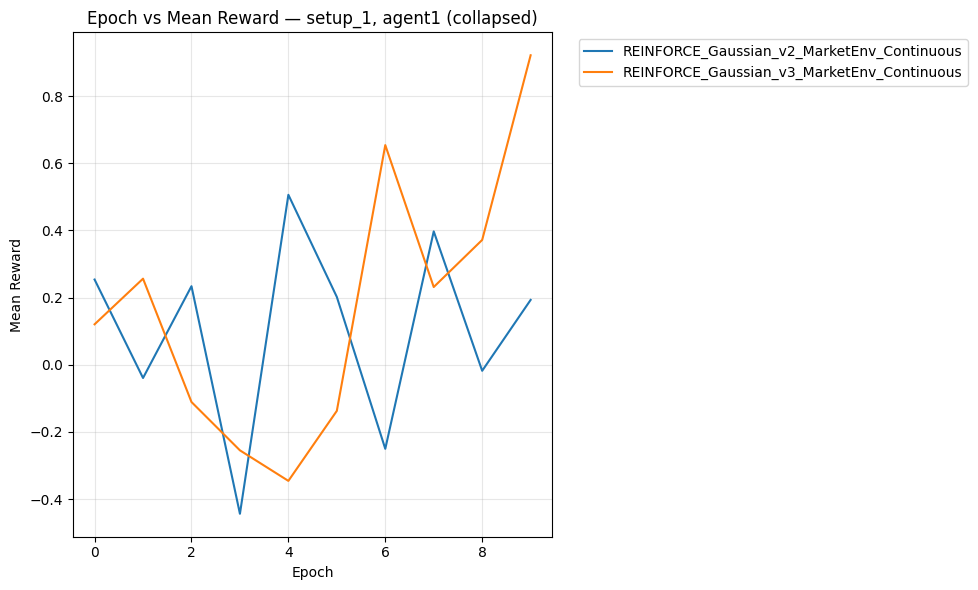

In [9]:
# Plot: epoch (x) vs mean_reward (y)
plt.figure(figsize=(10, 6))
if filtered.empty:
    plt.title('No data to plot')
else:
    if COLLAPSE_DUPLICATES:
        # Collapse multiple runs of the same policy_class by averaging mean_reward across runs per epoch
        collapsed = (
            filtered.groupby(['policy_class', 'epoch'], as_index=False)
            .agg(mean_reward=('mean_reward', 'mean'))
            .sort_values(['policy_class', 'epoch'])
        )
        for policy, grp in collapsed.groupby('policy_class'):
            plt.plot(grp['epoch'], grp['mean_reward'], label=str(policy))
        plt.title(f'Epoch vs Mean Reward — {SETUP}, {AGENT_NAME} (collapsed)')
    else:
        # One trace per (policy_class + run_id)
        filtered = filtered.copy()
        filtered['trace'] = filtered['policy_class'] + ' — ' + filtered['run_id'].str.slice(0, 8)
        for trace, grp in filtered.groupby('trace'):
            plt.plot(grp['epoch'], grp['mean_reward'], label=str(trace), alpha=0.9)
        plt.title(f'Epoch vs Mean Reward — {SETUP}, {AGENT_NAME} (per run)')

    plt.xlabel('Epoch')
    plt.ylabel('Mean Reward')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
    plt.tight_layout()
plt.show()